Title: 
    
Analysis of Algerian Forest Fires: An Inferential Explanation of Possible Correlation.

Introduction: 

Large sections of forest are destroyed everyday by forest fires. Not only do these types of natural disasters destroy the trees but they also exterminate and displace wildlife within the threatened ecosystem. Consequently, it would be of great beneficence to be able to pinpoint major factors(atmospheric conditions) contributing to these phenomena(forest fires) and allow for possible combatant scaffolding to be deduced.  The following research will examine a dataset (“Algerian_forest_fires_dataset_UPDATE.csv”) that contains a total of 244 instances of forest fires in two regions of Algeria(Bejaia region and Sidi Bel-abbes region) that were gathered between June and September of 2012. Since the most predominant cause of forest fires is lightning on dry trees and soil in low moisture conditions. To begin we will compare the "RH" column to “Temperature” column. We will analyze each variable to see if there is a correlation between that variable and the possible outcome of fire with respect to RH. 

Preliminary exploratory data analysis:

In [67]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library("readxl")
library(tidymodels)
library(lubridate)
library(ggplot2)
library(forcats)

The dataset can be read into R using the following read_csv function:Forest_fire <- read.csv("Project/Algerian_forest_fires_dataset_UPDATE.csv", skip=1), however, the dataset is actually consisting of 2 tables and we decided to separate it into two csv files. Hence we would use Bejaia <- read.csv("Bejaia.csv", skip=1), and Sidi_Bel_Abbes <- read_csv("Sidi_Bel_Abbes.csv", skip=1).

In [68]:
Bejaia <- read.csv("Bejaia.csv", skip=1)
Sidi_Bel_Abbes <- read_csv("Sidi_Bel_Abbes.csv", skip=1)

Parsed with column specification:
cols(
  day = col_double(),
  month = col_double(),
  year = col_double(),
  Temperature = col_double(),
  RH = col_double(),
  Ws = col_double(),
  Rain = col_double(),
  FFMC = col_double(),
  DMC = col_double(),
  DC = col_character(),
  ISI = col_double(),
  BUI = col_double(),
  FWI = col_character(),
  Classes = col_character()
)



In [69]:
set.seed(1)

In [70]:
bejaia<- Bejaia %>%  mutate(Class= fct_recode(Classes, "Not Fire"= 'not fire   ','not fire','not fire','not fire ', "Fire"= 'fire   ','fire','fire '))%>% select(-Classes) %>%
    filter(Class != "NA") %>%
    filter(Class != "")
#bejaia

bejaia%>%
    pull(Class)%>% 
    levels()

[1] ""         "Fire"     "Not Fire"

In [71]:
num_obs_bejaia <- nrow(bejaia)
bejaia_class_counts <- bejaia %>%
      group_by(Class) %>%
      summarize(
      n = n(),
      percentage = n() / num_obs_bejaia * 100
  )
bejaia_class_counts

`summarise()` ungrouping output (override with `.groups` argument)



Class,n,percentage
<fct>,<int>,<dbl>
Fire,53,46.90265
Not Fire,60,53.09735


In [72]:
Sidi_Bel_Abbes <- Sidi_Bel_Abbes %>% 
    filter(Classes != "NA") %>% 
    mutate(Classes= as_factor(Classes))

In [73]:
num_obs_sidi <- nrow(Sidi_Bel_Abbes)
sidi_bel_abbes_class_counts <- Sidi_Bel_Abbes %>%
      group_by(Classes) %>%
      summarize(
      n = n(),
      percentage = n() / num_obs_sidi * 100
  )
sidi_bel_abbes_class_counts

`summarise()` ungrouping output (override with `.groups` argument)



Classes,n,percentage
<fct>,<int>,<dbl>
not fire,43,35.53719
fire,78,64.46281


We decide to split the dataset into one training set and one testing set, with a 3:1 proportion.

In [74]:
Sidi_Bel_Abbes_split<- initial_split(Sidi_Bel_Abbes, prop = 0.75, strata = Classes)  
Sidi_Bel_Abbes_train <- training(Sidi_Bel_Abbes_split)   
Sidi_Bel_Abbes_test <- testing(Sidi_Bel_Abbes_split)
#Sidi_Bel_Abbes_train
#Sidi_Bel_Abbes_test

Bejaia_split<- initial_split(bejaia, prop = 0.75, strata = Class)  
Bejaia_train <- training(Bejaia_split)   
Bejaia_test <- testing(Bejaia_split)
#Bejaia_train
#Bejaia_test

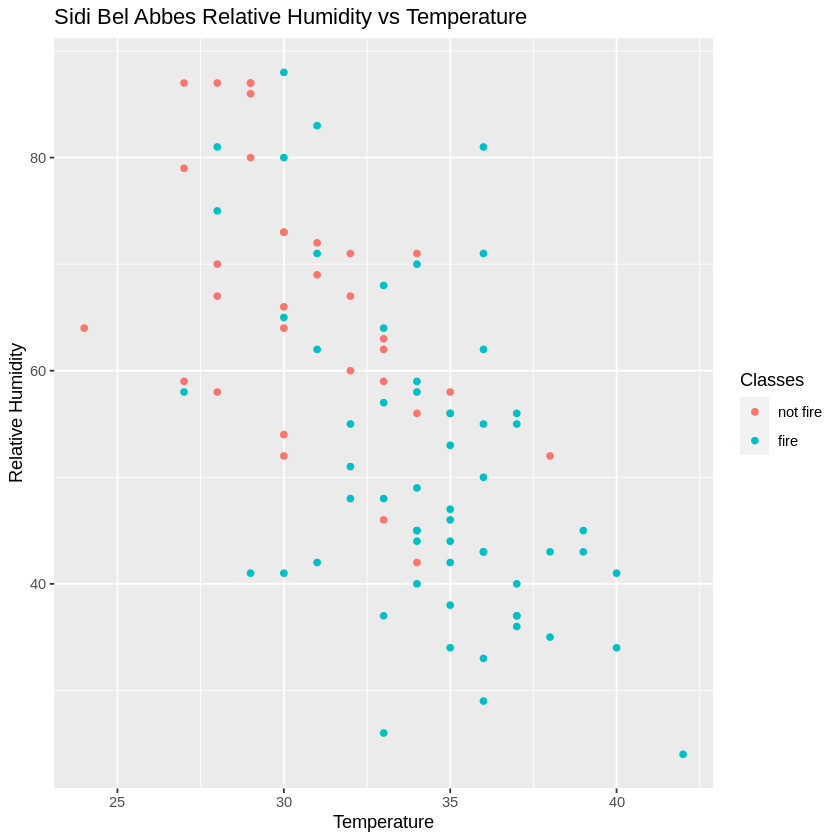

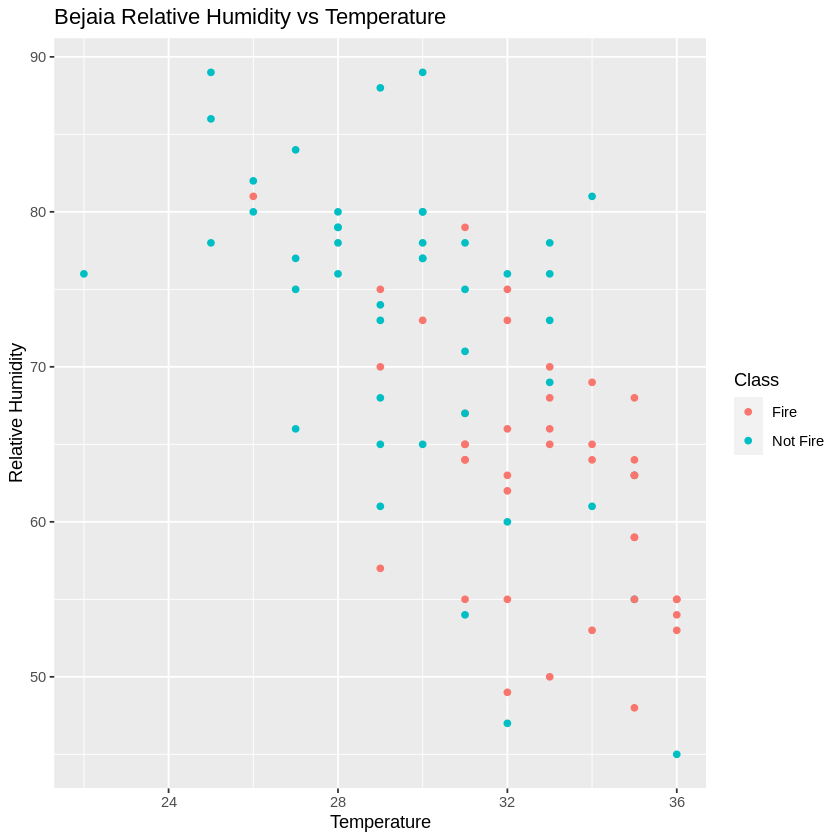

In [75]:
Sidi_Bel_Abbes_Tem <- Sidi_Bel_Abbes_train %>% 
select(Temperature, RH, Classes)%>%
#filter(Classes != "NA") %>%
ggplot(aes(x=Temperature, y= RH, color = Classes))+
geom_point()+
xlab("Temperature")+
ylab("Relative Humidity")+
labs(title="Sidi Bel Abbes Relative Humidity vs Temperature")
Sidi_Bel_Abbes_Tem

Bejaia_Tem <- Bejaia_train %>% 
select(Temperature, RH, Class)%>%
#filter(Class != "NA") %>%
#filter(Class != '') %>%
ggplot(aes(x=Temperature, y= RH, color = Class))+
geom_point()+
xlab("Temperature")+
ylab("Relative Humidity")+
labs(title="Bejaia Relative Humidity vs Temperature")
Bejaia_Tem



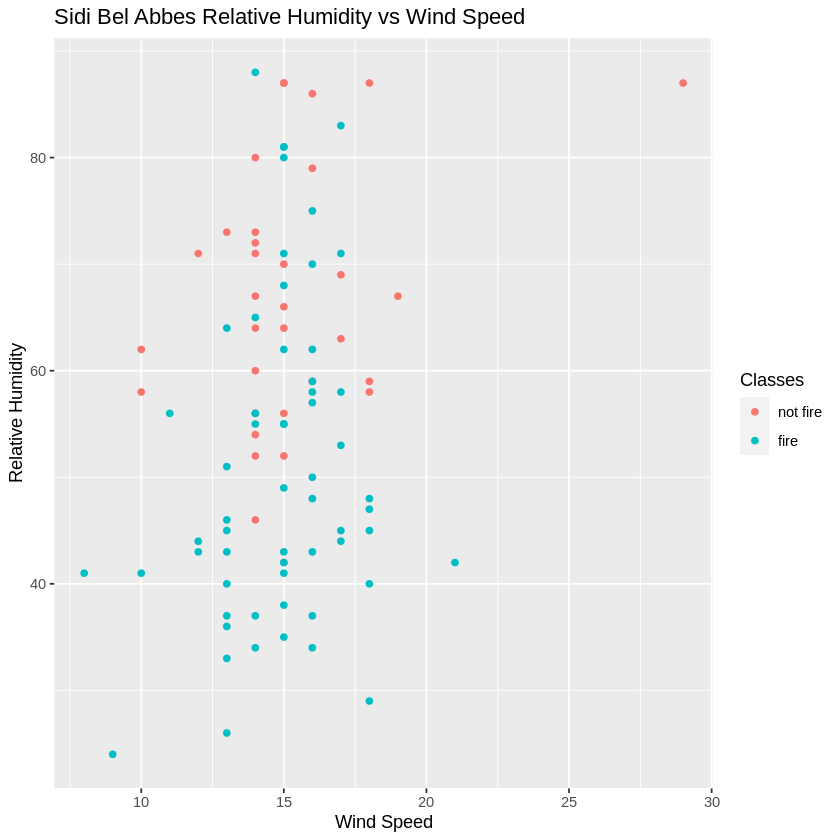

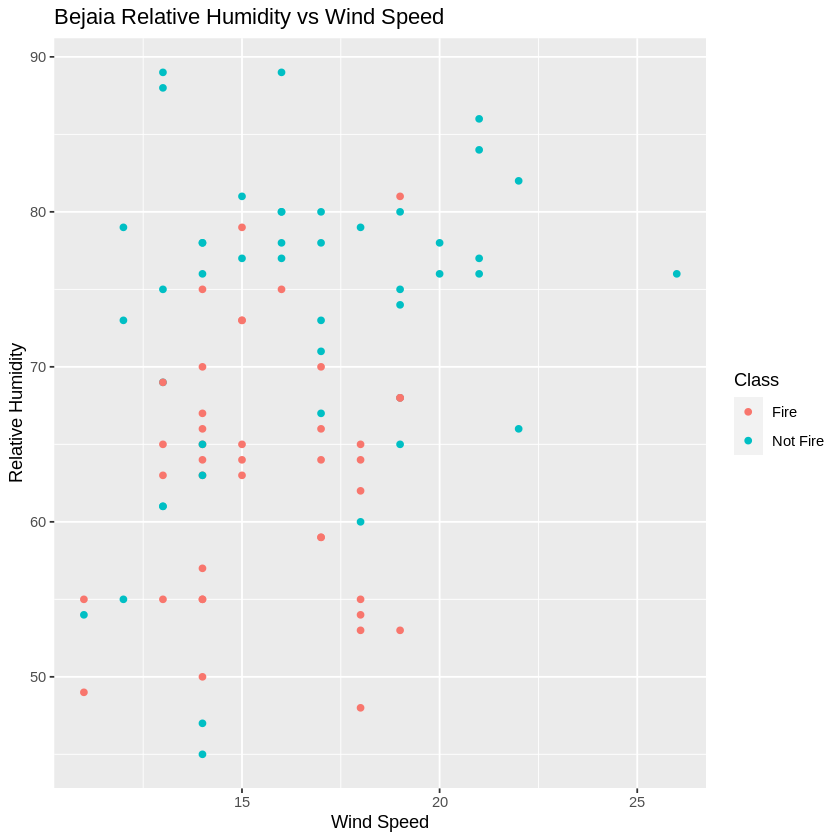

In [76]:
Sidi_Bel_Abbes_Ws <- Sidi_Bel_Abbes_train %>% 
select(Ws, RH, Classes)%>%
#filter(Classes != "NA") %>%
ggplot(aes(x=Ws, y= RH, color = Classes))+
geom_point()+
xlab("Wind Speed")+
ylab("Relative Humidity")+
labs(title="Sidi Bel Abbes Relative Humidity vs Wind Speed")
Sidi_Bel_Abbes_Ws

Bejaia_Ws <- Bejaia_train %>% 
select(Ws, RH, Class)%>%
#filter(Class != "NA") %>%
#filter(Class != '') %>%
ggplot(aes(x=Ws, y= RH, color = Class))+
geom_point()+
xlab("Wind Speed")+
ylab("Relative Humidity")+
labs(title="Bejaia Relative Humidity vs Wind Speed")
Bejaia_Ws

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
5,rmse,standard,12.70169,5,0.526308,Model3


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,14.2225174
rsq,standard,0.1970082
mae,standard,11.9379310


.pred,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<fct>
60.2,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
62.0,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
76.2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
62.0,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
60.2,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire
43.4,7,6,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6,fire
70.0,9,6,2012,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,not fire
62.0,10,6,2012,30,41,15,0.0,89.4,13.3,22.5,8.4,13.1,10,fire
65.6,11,6,2012,31,42,21,0.0,90.6,18.2,30.5,13.4,18.0,16.7,fire


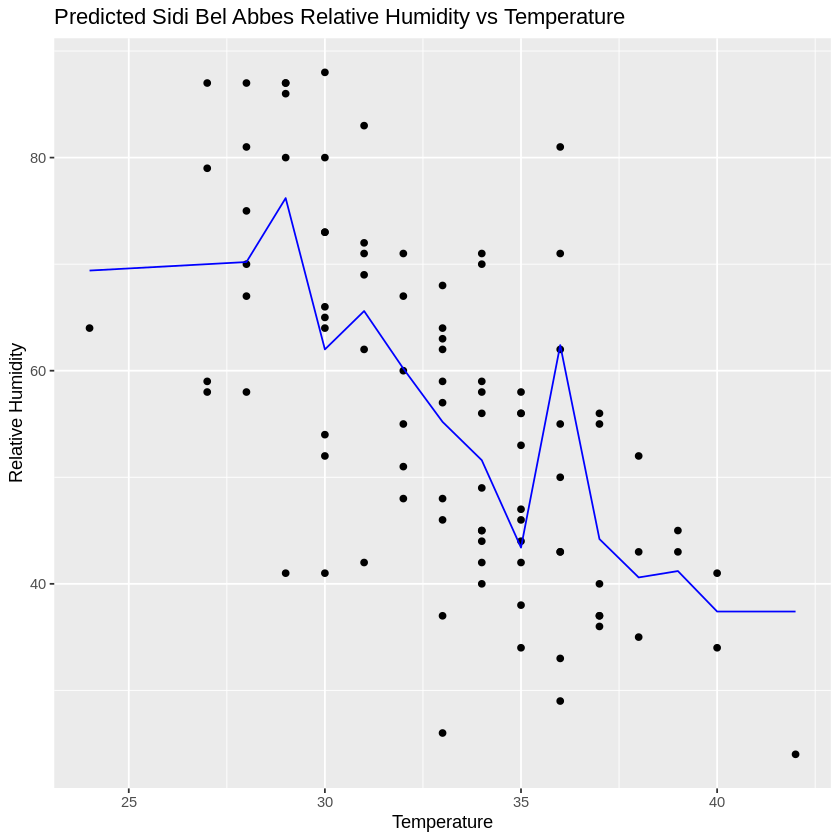

In [77]:
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
          set_engine("kknn") %>%
          set_mode("regression") 

SBA_Tem_recipe <- recipe(RH ~ Temperature, data = Sidi_Bel_Abbes_train)

SBA_vfold_Tem <- vfold_cv(Sidi_Bel_Abbes_train, v =5 , strata =RH)

SBA_Tem_results <- workflow() %>%
           add_recipe(SBA_Tem_recipe) %>%
           add_model(knn_tune) %>%
           tune_grid(resamples = SBA_vfold_Tem, grid = 10) %>%
           collect_metrics() %>%
           filter(.metric == "rmse") %>%
           arrange(mean) %>% 
           slice(1)

SBA_Tem_results

K_SBA_Tem <- SBA_Tem_results %>%
pull(1)

SBA_Tem_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = K_SBA_Tem) %>% 
       set_engine("kknn") %>%
       set_mode("regression")


SBA_Tem_best_fit <- workflow() %>%
          add_recipe(SBA_Tem_recipe) %>%
          add_model(SBA_Tem_spec) %>%
          fit(data = Sidi_Bel_Abbes_train)
SBA_Tem_summary <- SBA_Tem_best_fit %>%
           predict(Sidi_Bel_Abbes_test) %>%
           bind_cols(Sidi_Bel_Abbes_test)%>%
           metrics(truth = RH, estimate = .pred)
SBA_Tem_summary

SBA_Tem_preds<- SBA_Tem_best_fit %>% predict(Sidi_Bel_Abbes_train)%>%
       bind_cols(Sidi_Bel_Abbes_train)
SBA_Tem_preds
SBA_Tem_plot <- SBA_Tem_preds %>% ggplot(aes(x = Temperature, y = RH))+
        geom_point() +
        geom_line(aes(x=Temperature,y=.pred),color="blue") +
        ggtitle("Predicted Sidi Bel Abbes Relative Humidity vs Temperature")+
        xlab("Temperature") +
        ylab("Relative Humidity")

SBA_Tem_plot



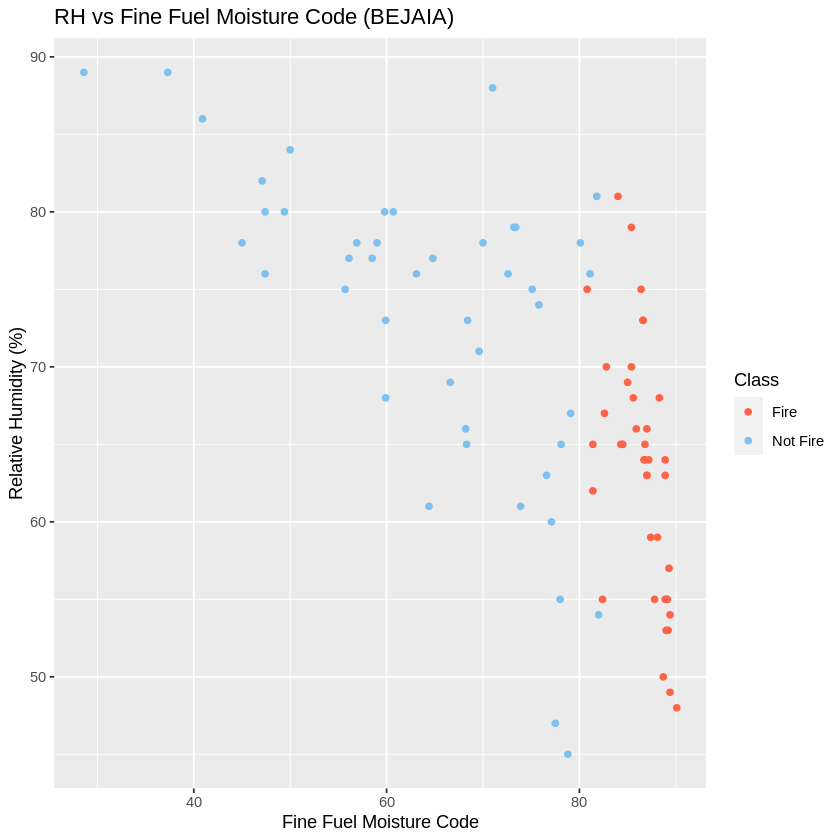

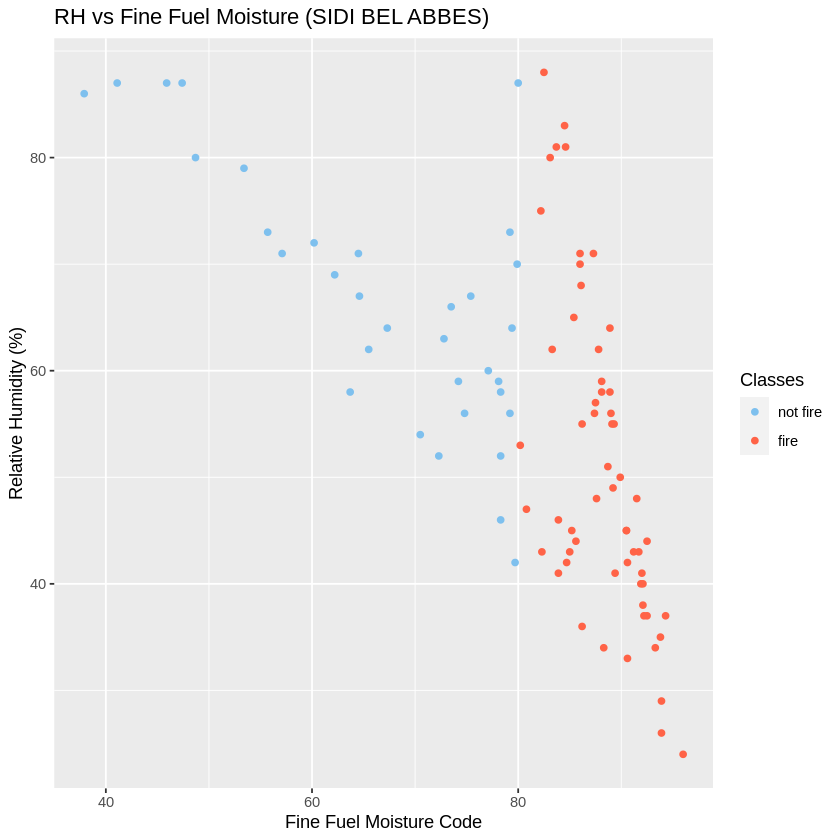

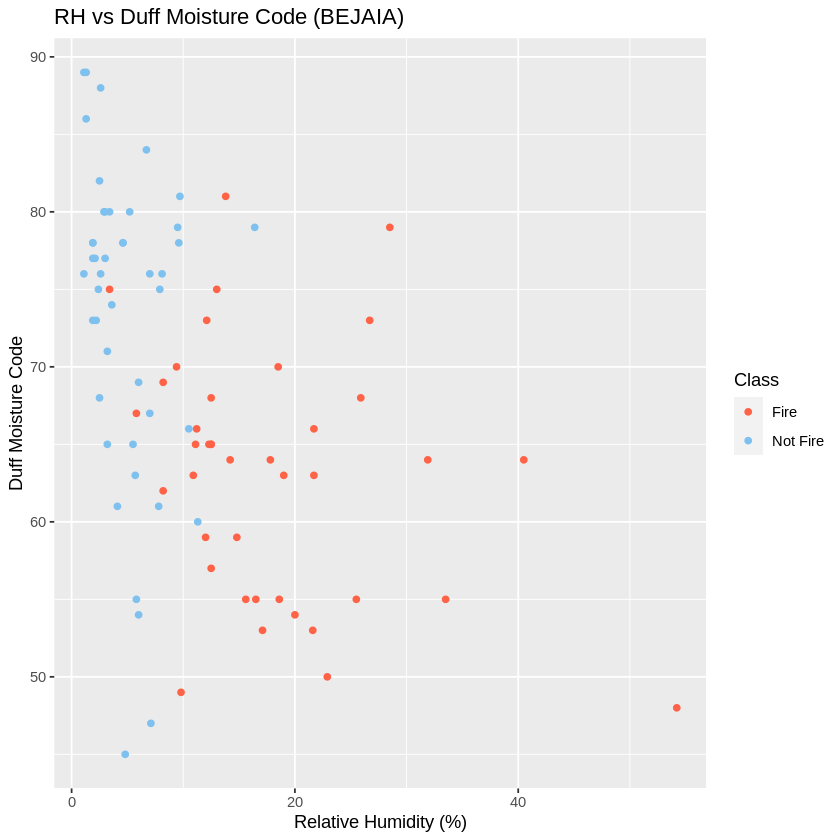

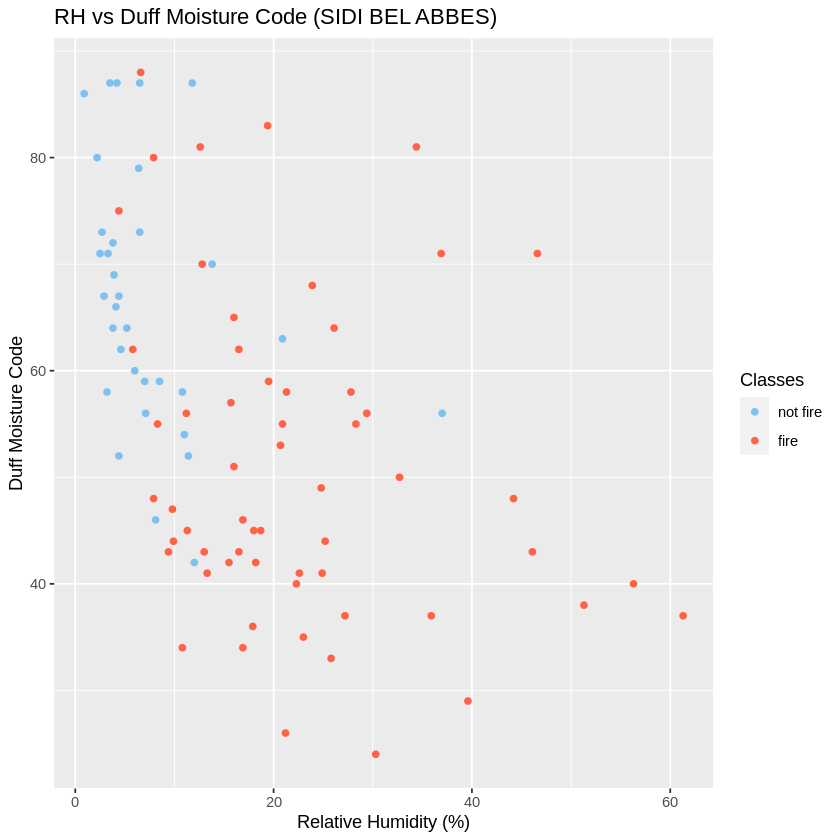

In [81]:
Bejaia_RH_FFMC <- Bejaia_train %>%
    select(RH, Class, FFMC) %>%
    ggplot(aes(x=FFMC,y=RH,color=Class)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Fine Fuel Moisture Code",title="RH vs Fine Fuel Moisture Code (BEJAIA)") +
    scale_color_manual (values=c("Fire"="tomato",
                                "Not Fire"="skyblue2"))
Bejaia_RH_FFMC

Sidi_Bel_Abbes_RH_FFMC <- Sidi_Bel_Abbes_train%>% 
    select(RH,FFMC,Classes) %>%
    
    ggplot(aes(x=FFMC,y=RH,color=Classes)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Fine Fuel Moisture Code", title="RH vs Fine Fuel Moisture (SIDI BEL ABBES)")+
    scale_color_manual (values=c("fire"="tomato",
                                "not fire"="skyblue2"))
Sidi_Bel_Abbes_RH_FFMC

Bejaia_RH_DMC <- Bejaia_train %>%
    select(RH, Class, DMC) %>%
    
    ggplot(aes(x=DMC,y=RH,color=Class)) +
    geom_point() + 
    labs(x="Relative Humidity (%)", y="Duff Moisture Code",title="RH vs Duff Moisture Code (BEJAIA)")+
    scale_color_manual (values=c("Fire"="tomato",
                                "Not Fire"="skyblue2"))
Bejaia_RH_DMC

Sidi_Bel_Abbes_RH_DMC <- Sidi_Bel_Abbes_train%>% 
    select(RH,DMC,Classes) %>%
    
    ggplot(aes(x=DMC,y=RH,color=Classes)) +
    geom_point() + 
    labs(x="Relative Humidity (%)", y="Duff Moisture Code",title="RH vs Duff Moisture Code (SIDI BEL ABBES)") +
    scale_color_manual (values=c("fire"="tomato",
                                "not fire"="skyblue2"))
Sidi_Bel_Abbes_RH_DMC

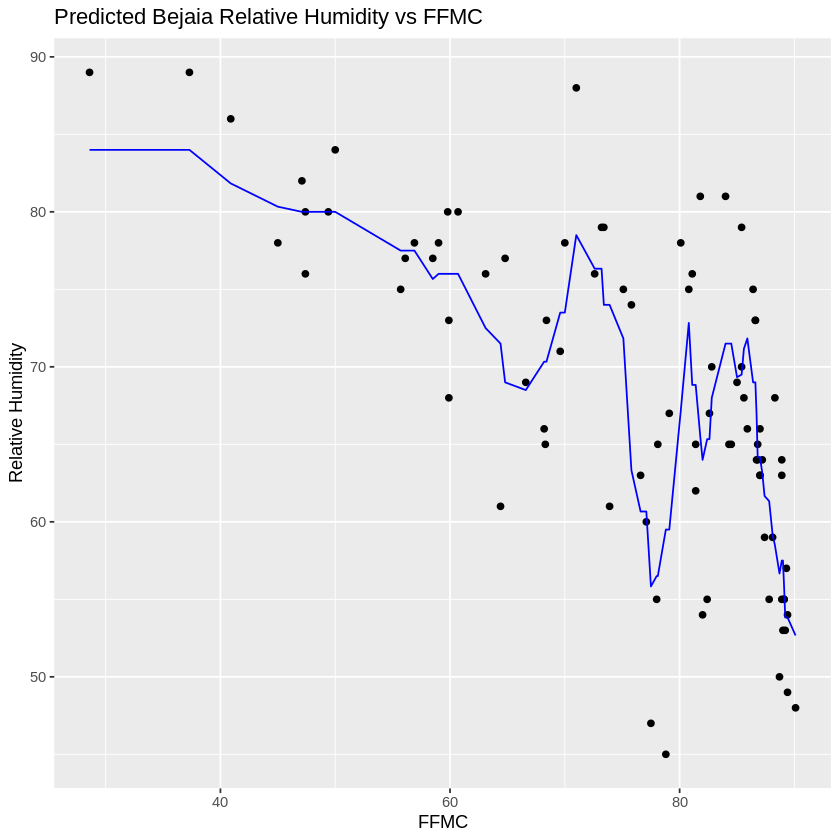

In [79]:
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
          set_engine("kknn") %>%
          set_mode("regression") 

Bej_FFMC_recipe <- recipe(RH ~ FFMC, data = Bejaia_train)

Bej_vfold_FFMC <- vfold_cv(Bejaia_train, v =5 , strata =RH)

Bej_FFMC_results <- workflow() %>%
           add_recipe(Bej_FFMC_recipe) %>%
           add_model(knn_tune) %>%
           tune_grid(resamples = Bej_vfold_FFMC, grid = 10) %>%
           collect_metrics() %>%
           filter(.metric == "rmse") %>%
           arrange(mean) %>% 
           slice(1)

#Bej_FFMC_results

K_Bej_FFMC <- Bej_FFMC_results %>%
pull(1)

Bej_FFMC_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = K_Bej_FFMC) %>% 
       set_engine("kknn") %>%
       set_mode("regression")


Bej_FFMC_best_fit <- workflow() %>%
          add_recipe(Bej_FFMC_recipe) %>%
          add_model(Bej_FFMC_spec) %>%
          fit(data = Bejaia_train)
Bej_FFMC_summary <- Bej_FFMC_best_fit %>%
           predict(Bejaia_test) %>%
           bind_cols(Bejaia_test)%>%
           metrics(truth = RH, estimate = .pred)
#Bej_FFMC_summary

Bej_FFMC_preds<-Bej_FFMC_best_fit %>% predict(Bejaia_train)%>%
       bind_cols(Bejaia_train)

#Bej_FFMC_preds

Bej_FFMC_plot <- Bej_FFMC_preds %>% ggplot(aes(x = FFMC, y = RH))+
        geom_point() +
        geom_line(aes(x=FFMC,y=.pred),color="blue") +
        ggtitle("Predicted Bejaia Relative Humidity vs FFMC")+
        xlab("FFMC") +
        ylab("Relative Humidity")

Bej_FFMC_plot

In [80]:
Bej_FFMC_R_recipe <- recipe(Class ~ FFMC + RH, data=Bejaia_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

Bej_knn_spec_R <- nearest_neighbor(weight_func="rectangular", neighbors=3) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Bej_FFMC_Fit_R <- workflow() %>%
    add_recipe(Bej_FFMC_R_recipe) %>%
    add_model(Bej_knn_spec_R) %>%
    fit(data=Bejaia_train)
Bej_FFMC_Fit_R

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~3, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1058824
Best kernel: rectangular
Best k: 3

Expected outcomes and significance:

 In this study we expect to discover a relationship between the most contributing atmospheric condition(s) of the area to the presence of fire. If we can determine a reliable relationship we can attempt to predict areas with a high likelihood of fire. This information can alos allow proper allocation of fire fighting resources to vulnerable areas. We hope our findings can lead to a better understanding of how and why fires occur in forests and how the changing global climate will affect the location and frequency of forest fires.
    